In [1]:
#%matplotlib notebook
import time, winsound, h5py, os
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline
from tqdm import tqdm

%load_ext autoreload
%autoreload 2
from Functions import *
from LCLS_Optics import *

In [20]:
N = 1024       # number of sampling points
E0 = 9.9e3    # photon energy in eV
FOV = 2e-3   # [m]

tau = 400
window = 5000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 50e-6/(2*np.sqrt(2*np.log(2))),
    'sigma_y': 50e-6/(2*np.sqrt(2*np.log(2))),
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 0
}


In [21]:
def define_bl(E0=9000, FOV=1e-3, N=1024):
    crystal1 = optics.Crystal('c1', hkl=[5,5,5], length=10e-2, width=10e-2, z=100., E0=E0,
                             alphaAsym=0, orientation=1, pol='s', asym_type='emergence')
    im0 = optics.PPM('im0', z = crystal1.z-50., FOV=FOV, N=N)
    im1 = optics.PPM('im1', z = crystal1.z-.01, FOV=FOV, N=N)
    im2 = optics.PPM('im2', z = crystal1.z-50., FOV=FOV, N=N)
    devices = [im0, im1, crystal1, im2]
    return devices

In [22]:
devices = define_bl(E0=E0, FOV=FOV, N=N)
bl = beamline.Beamline(devices, ordered=True)

print('\nOE positions')
for device in devices:
    print(device.name, device.z)

b 1.00
after c1: 3.0341

OE positions
im0 50.0
im1 99.99
c1 100.0
im2 50.0


In [23]:
%%capture capt
tstart = time.time()
# propagate
beam_params['photonEnergy'] = E0
pulse = beam.Pulse(beam_params=beam_params, tau=tau, time_window=window)
pulse.propagate(beamline=bl, screen_names=['im0','im1','im2'])
tfin = time.time()

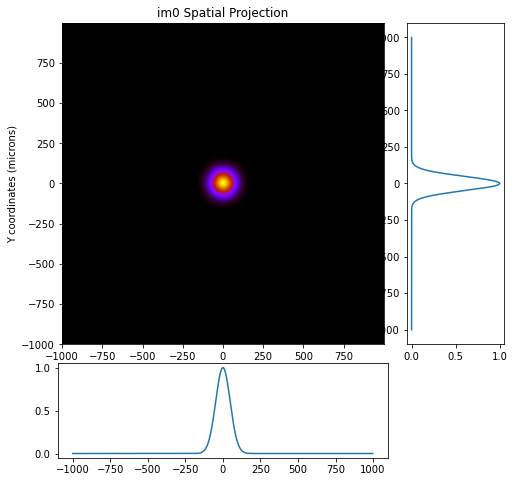

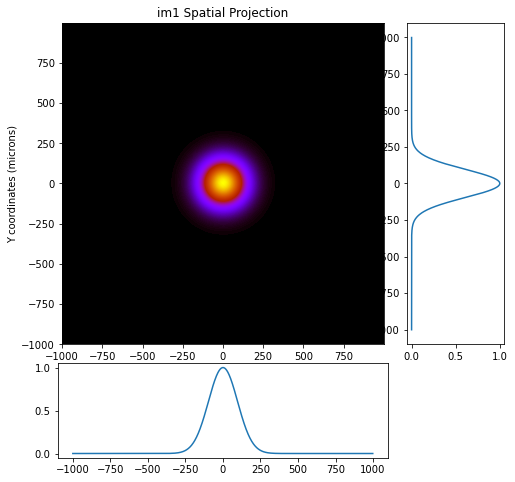

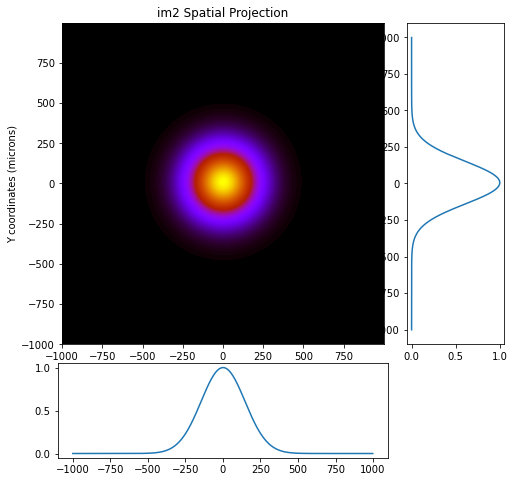

In [24]:
''' beam profiles '''
im_names = ['im0', 'im1', 'im2']

for i in range(len(im_names)):
    im_name = im_names[i]
    pulse.imshow_projection(im_name)


In [ ]:
''' time profiles '''
for i in range(len(im_names)):
    im_name = im_names[i]
    for dim in ['x','y']:
        pulse.imshow_time_slice(im_name, dim=dim)
        pulse.imshow_energy_slice(im_name, dim=dim)


In [ ]:
''' energy profiles '''
for i in range(len(im_names)):
    im_name = im_names[i]
    for dim in ['x','y']:
        pulse.imshow_energy_slice(im_name, dim=dim)


### As shown above, the beam profile does get larger in im2. This shows that backward propagation works